# Feature Engineering

-   Create new features based on insights from EDA
-   Handle categorical variables (encoding)
-   Normalize or standardize numerical features
-   Feature selection

## Feature Ideas


In [148]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd
import numpy as np

# Add the project root to the Python path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

from src.features.preprocessing import (
    preprocess_data,
    engineer_features,
    select_features
)
from src.features.feature_eng import *

from src.visualization.distribution_plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Load the data
df_all_years = pd.read_parquet('../data/02_interim/df_all_years.parquet')
df_2016_plus = pd.read_parquet('../data/02_interim/df_2016_plus.parquet')

In [44]:
def process_and_analyze_df(df, df_name):
    # Engineer features
    df_engineered = engineer_features(df)

    # Select all features
    df_selected = select_features(df_engineered)

    # Preprocess the data (this combines engineering and selection)
    df_preprocessed = preprocess_data(df)

    return df_preprocessed

In [173]:
# Process and analyze each DataFrame
df_all_years_preprocessed = process_and_analyze_df(df_all_years, "All Years Data")
df_2016_plus_preprocessed = process_and_analyze_df(df_2016_plus, "2016+ Data")

In [174]:
# Save the preprocessed data
output_path_all_years = '../data/03_processed/preprocessed_all_years.parquet'
output_path_2016_plus = '../data/03_processed/preprocessed_2016_plus.parquet'

df_all_years_preprocessed.to_parquet(output_path_all_years, index=False)
df_2016_plus_preprocessed.to_parquet(output_path_2016_plus, index=False)

print(f"\nPreprocessed all years data saved to: {output_path_all_years}")
print(f"Preprocessed 2016+ data saved to: {output_path_2016_plus}")



Preprocessed all years data saved to: ../data/03_processed/preprocessed_all_years.parquet
Preprocessed 2016+ data saved to: ../data/03_processed/preprocessed_2016_plus.parquet


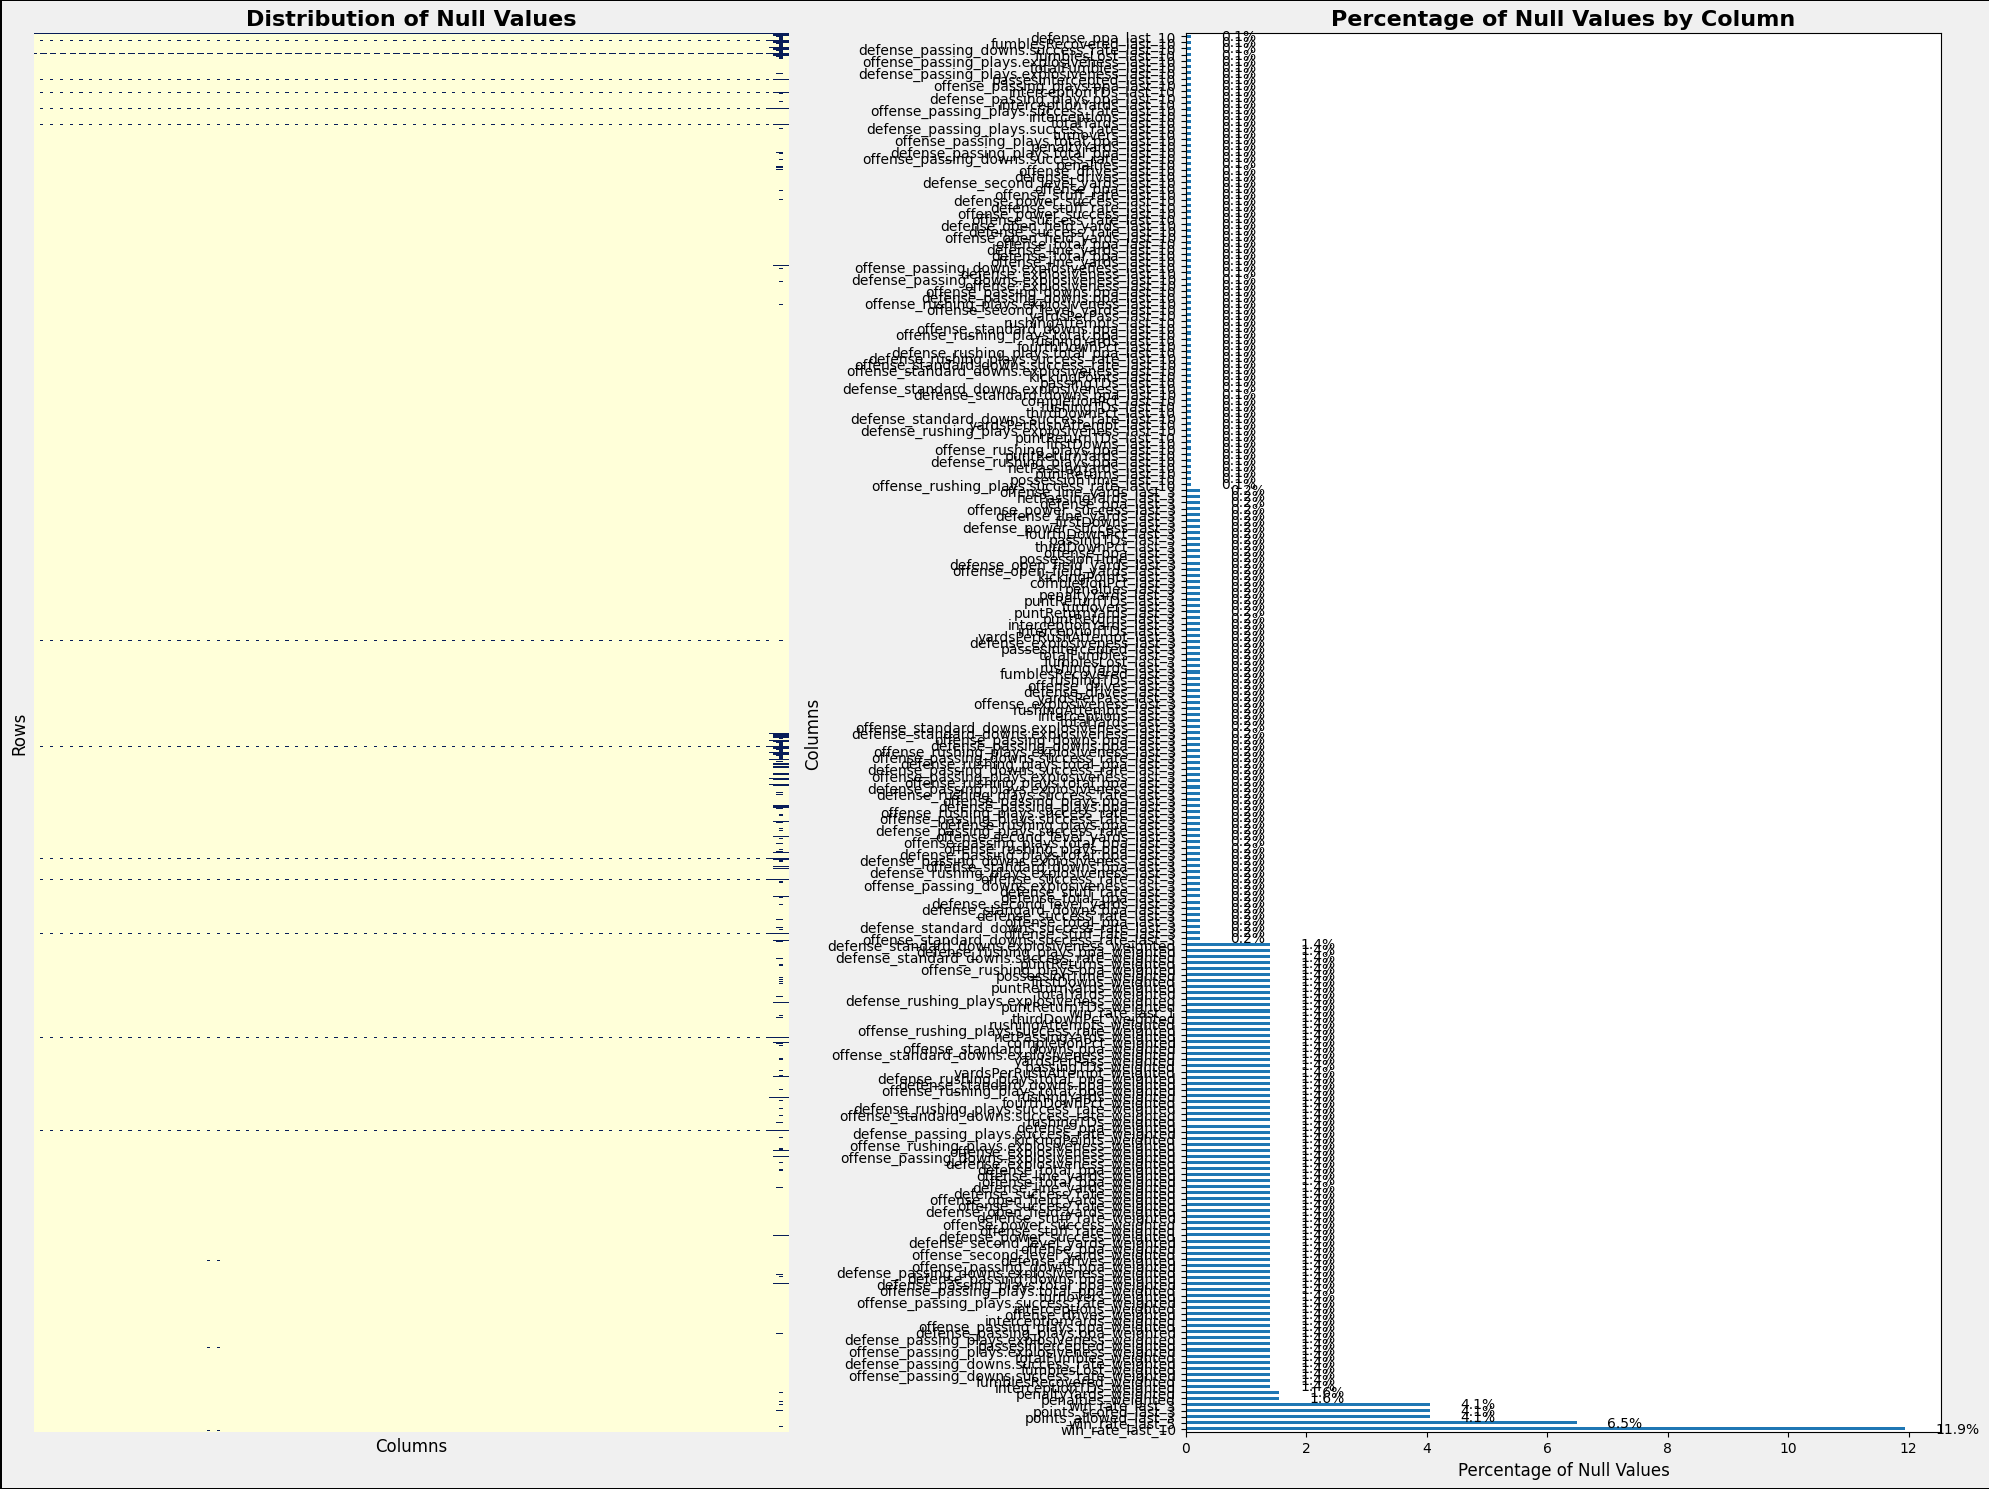

Columns with null values (sorted by percentage, descending):
win_rate_last_10: 1964 null values (11.95%)
win_rate_last_5: 1068 null values (6.50%)
points_allowed_last_3: 666 null values (4.05%)
points_scored_last_3: 666 null values (4.05%)
win_rate_last_3: 666 null values (4.05%)
penalties_weighted: 255 null values (1.55%)
penaltyYards_weighted: 255 null values (1.55%)
interceptionTDs_weighted: 230 null values (1.40%)
fumblesRecovered_weighted: 230 null values (1.40%)
offense_passing_downs.success_rate_weighted: 230 null values (1.40%)
fumblesLost_weighted: 230 null values (1.40%)
defense_passing_downs.success_rate_weighted: 230 null values (1.40%)
totalFumbles_weighted: 230 null values (1.40%)
offense_passing_plays.explosiveness_weighted: 230 null values (1.40%)
passesIntercepted_weighted: 230 null values (1.40%)
defense_passing_plays.explosiveness_weighted: 230 null values (1.40%)
defense_passing_plays.ppa_weighted: 230 null values (1.40%)
offense_passing_plays.ppa_weighted: 230 null

In [175]:
visualize_null_values(df_all_years_preprocessed)

In [168]:
# Sort df_all_years by start_date in descending order and take the latest 500 rows
df_random = df_all_years.sort_values('start_date', ascending=False).head(500).reset_index(drop=True)

In [169]:
df_random_preprocessed = process_and_analyze_df(df_random, "Random")

Calculating feature: win_rate_last_5
Feature win_rate_last_5 shape: (500,)
Calculating feature: win_rate_last_10
Feature win_rate_last_10 shape: (500,)
Calculating feature: win_rate_season
Calculating season win rate
Season win rate calculation complete. Shape: (500,)
Feature win_rate_season shape: (500,)
Calculating feature: points_scored_last_3
Feature points_scored_last_3 shape: (500,)
Calculating feature: points_allowed_last_3
Feature points_allowed_last_3 shape: (500,)
Calculating feature: win_rate_last_5
Feature win_rate_last_5 shape: (500,)
Calculating feature: win_rate_last_10
Feature win_rate_last_10 shape: (500,)
Calculating feature: win_rate_season
Calculating season win rate
Season win rate calculation complete. Shape: (500,)
Feature win_rate_season shape: (500,)
Calculating feature: points_scored_last_3
Feature points_scored_last_3 shape: (500,)
Calculating feature: points_allowed_last_3
Feature points_allowed_last_3 shape: (500,)


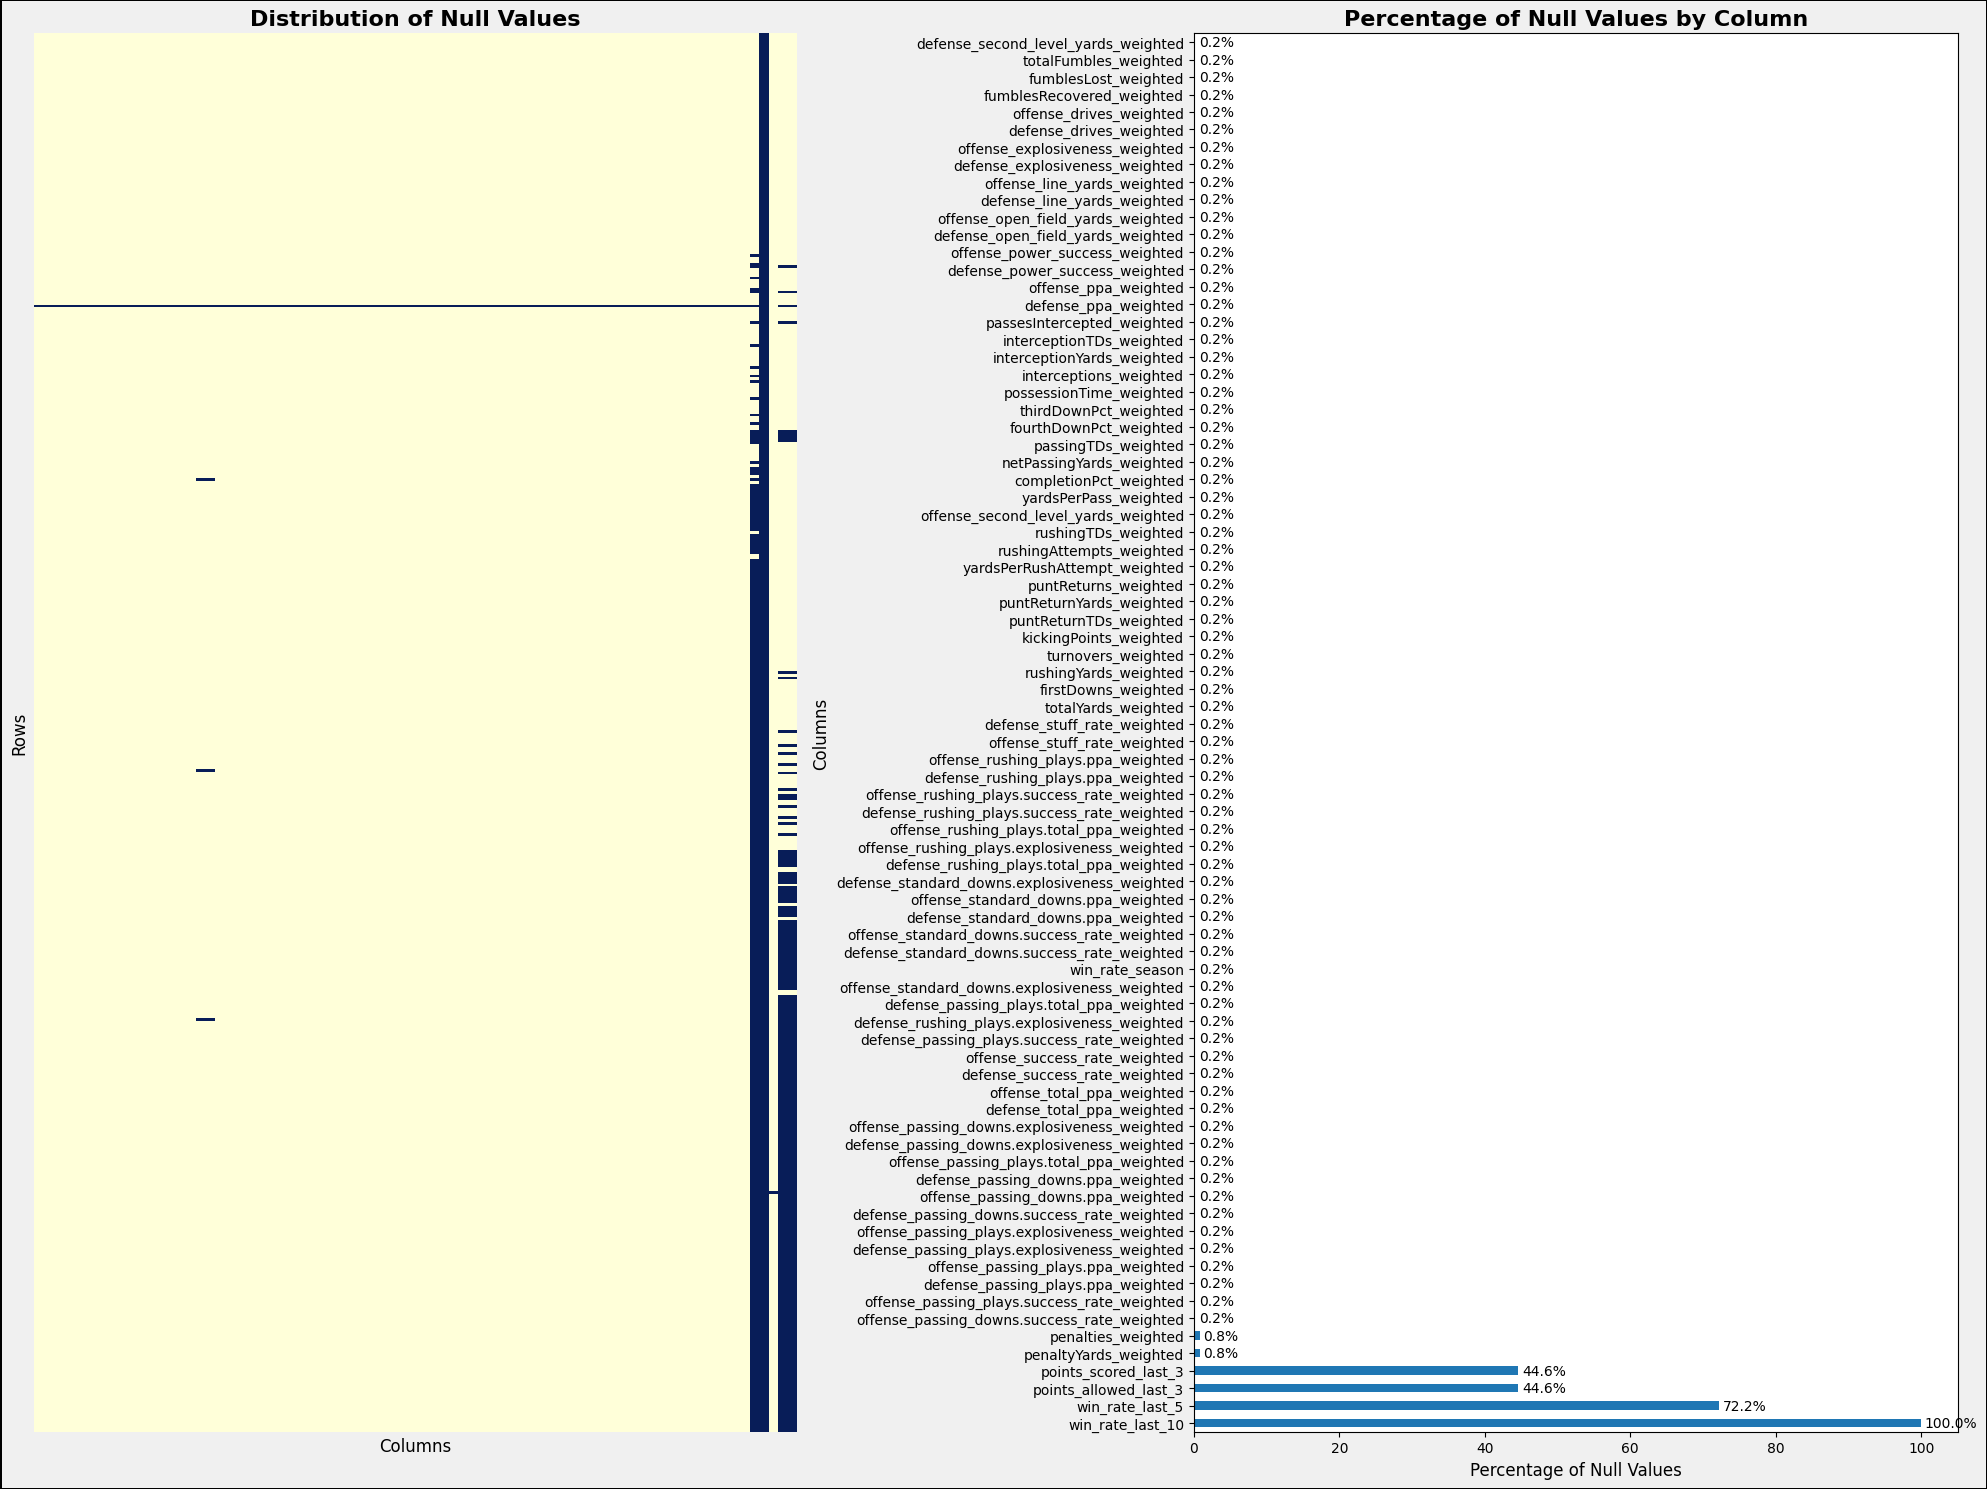

Columns with null values (sorted by percentage, descending):
win_rate_last_10: 500 null values (100.00%)
win_rate_last_5: 361 null values (72.20%)
points_allowed_last_3: 223 null values (44.60%)
points_scored_last_3: 223 null values (44.60%)
penaltyYards_weighted: 4 null values (0.80%)
penalties_weighted: 4 null values (0.80%)
offense_passing_downs.success_rate_weighted: 1 null values (0.20%)
offense_passing_plays.success_rate_weighted: 1 null values (0.20%)
defense_passing_plays.ppa_weighted: 1 null values (0.20%)
offense_passing_plays.ppa_weighted: 1 null values (0.20%)
defense_passing_plays.explosiveness_weighted: 1 null values (0.20%)
offense_passing_plays.explosiveness_weighted: 1 null values (0.20%)
defense_passing_downs.success_rate_weighted: 1 null values (0.20%)
offense_passing_downs.ppa_weighted: 1 null values (0.20%)
defense_passing_downs.ppa_weighted: 1 null values (0.20%)
offense_passing_plays.total_ppa_weighted: 1 null values (0.20%)
defense_passing_downs.explosiveness_we

In [170]:
visualize_null_values(df_random_preprocessed)